In [1]:
#requirements
#pip3 install pandas numpy seaborn matplotlib

In [2]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/datasets/onemonth.csv')
df.set_index('ds',inplace=True)
print(df.head(5))
print(df.tail(5))
print(df.describe())
print(df.dtypes)
print(len(df['y']))

                        y
ds                       
13/05/2024 00:00:00  6.61
13/05/2024 00:00:05  6.66
13/05/2024 00:00:10  6.66
13/05/2024 00:00:15  6.41
13/05/2024 00:00:20  6.41
                        y
ds                       
13/06/2024 23:59:40  2.81
13/06/2024 23:59:45  2.91
13/06/2024 23:59:50  2.91
13/06/2024 23:59:55  2.84
14/06/2024 00:00:00  2.84
                   y
count  552726.000000
mean        4.402680
std         2.345591
min         0.450000
25%         2.250000
50%         4.580000
75%         5.960000
max        25.630000
y    float64
dtype: object
552726


**DATA PREP**

**IQR**

#measure the spread of the middle 50% of the dataset, diff between first and third quartile


<Axes: xlabel='ds'>

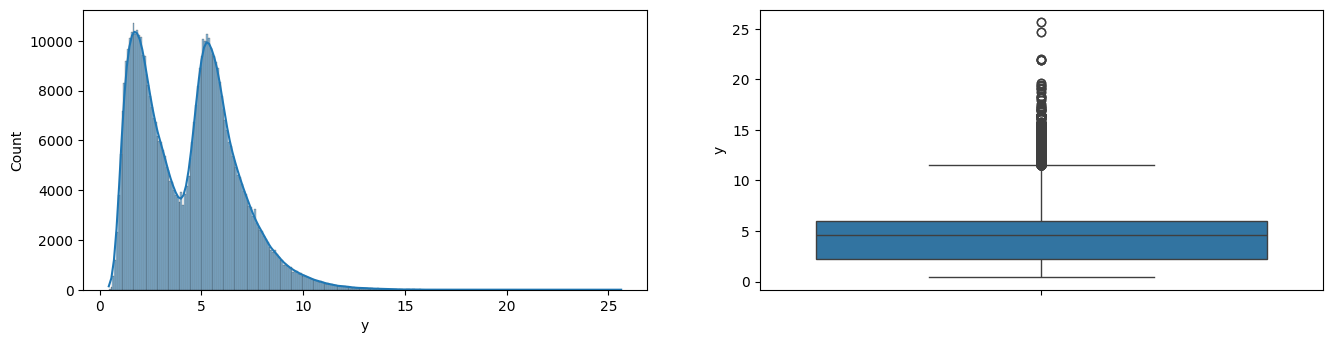

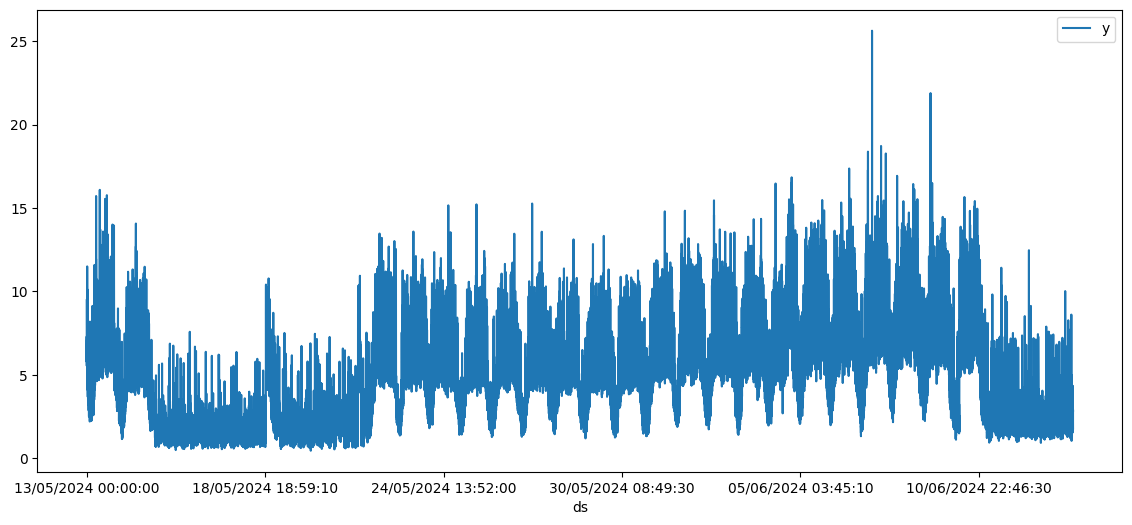

In [4]:
import seaborn as sns
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.histplot(df['y'], kde=True)
plt.subplot(2,2,2)
sns.boxplot(data = df['y'])
df.plot(figsize=(14, 6))

In [5]:
#finding iqr, upper limit and lower limit
import numpy as np
q3, q1 = np.percentile(df['y'],[75,25])
iqr = q3-q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

print(f"iqr : {iqr}")
print(f"upper limit : {upper_limit}")
print(f"lower limit : {lower_limit}")

iqr : 3.71
upper limit : 11.524999999999999
lower limit : -3.3149999999999995


In [6]:
#finding outliers

df[df['y']>upper_limit].count()

y    2652
dtype: int64

In [7]:
#Trimming

new_df = df[df['y'] <upper_limit]
print(new_df.describe())

                   y
count  550074.000000
mean        4.362149
std         2.275328
min         0.450000
25%         2.240000
50%         4.560000
75%         5.940000
max        11.520000


<Axes: ylabel='y'>

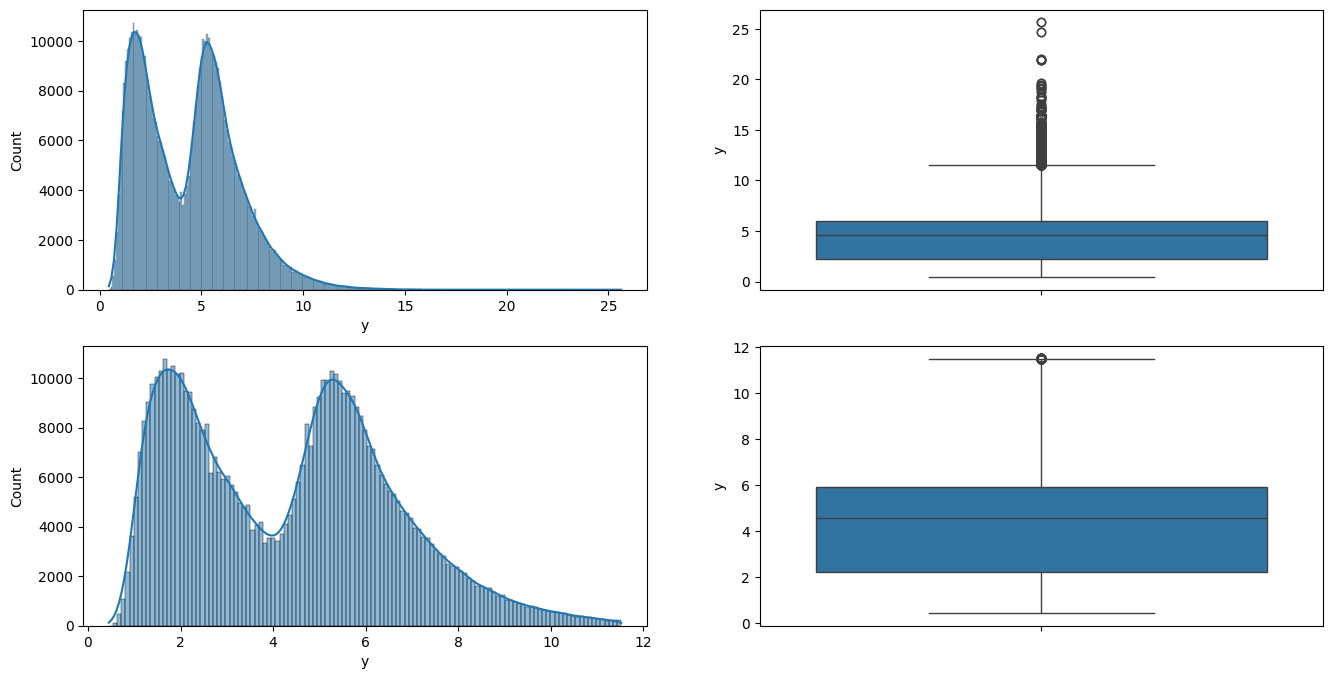

In [8]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.histplot(df['y'], kde=True)
plt.subplot(2,2,2)
sns.boxplot(data = df['y'])

plt.subplot(2,2,3)
sns.histplot(new_df['y'], kde=True)
plt.subplot(2,2,4)
sns.boxplot(data = new_df['y'])

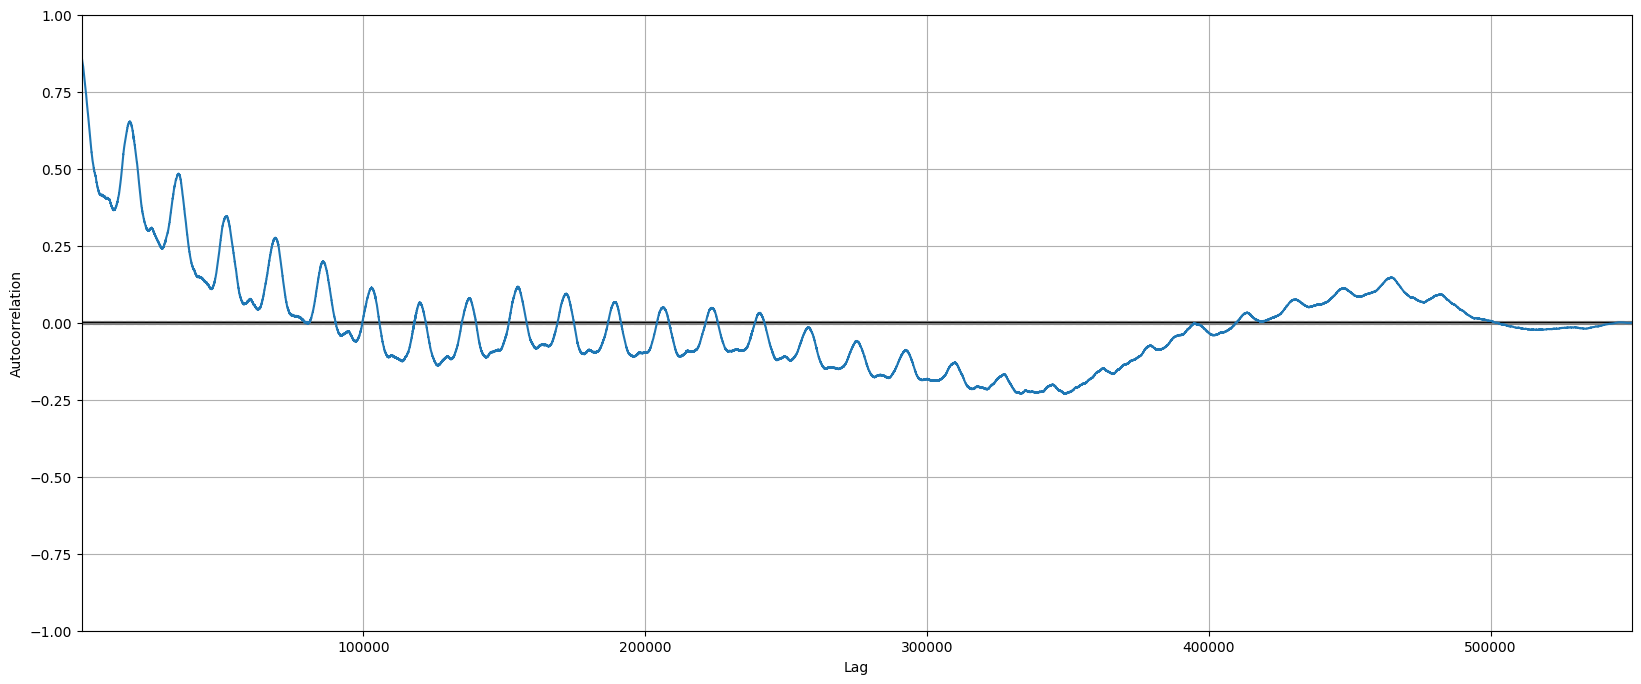

In [10]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize = (20,8))
autocorrelation_plot(new_df)
pyplot.show()

In [11]:
#Let’s check that if the given dataset is stationary or not, For that we use adfuller.
from statsmodels.tsa.stattools import adfuller

**ARIMA**

**Building an ARIMA Model: A Step-by-Step Guide:**
    
    1. Model Definition: Initialize the ARIMA model by invoking ARIMA() and specifying the p, d, and q parameters.
    2. Model Training: Train the model on your dataset using the fit() method.
    3. Making Predictions: Generate forecasts by utilizing the predict() function and designating the desired time index or indices.


In [12]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(new_df['y'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               550074
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -157924.325
Date:                Sun, 07 Jul 2024   AIC                         315854.649
Time:                        19:06:46   BIC                         315888.303
Sample:                             0   HQIC                        315864.139
                             - 550074                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0007     91.019   8.05e-06      1.000    -178.393     178.395
ma.L1         -0.0007     90.914  -8.14e-06      1.000    -178.188     178.187
sigma2         0.1040    2.5e-05   4151.793      0.000       0.104       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         358578738.73
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.97   Skew:                             8.85
Prob(H) (two-sided):                  0.00   Kurtosis:                       126.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

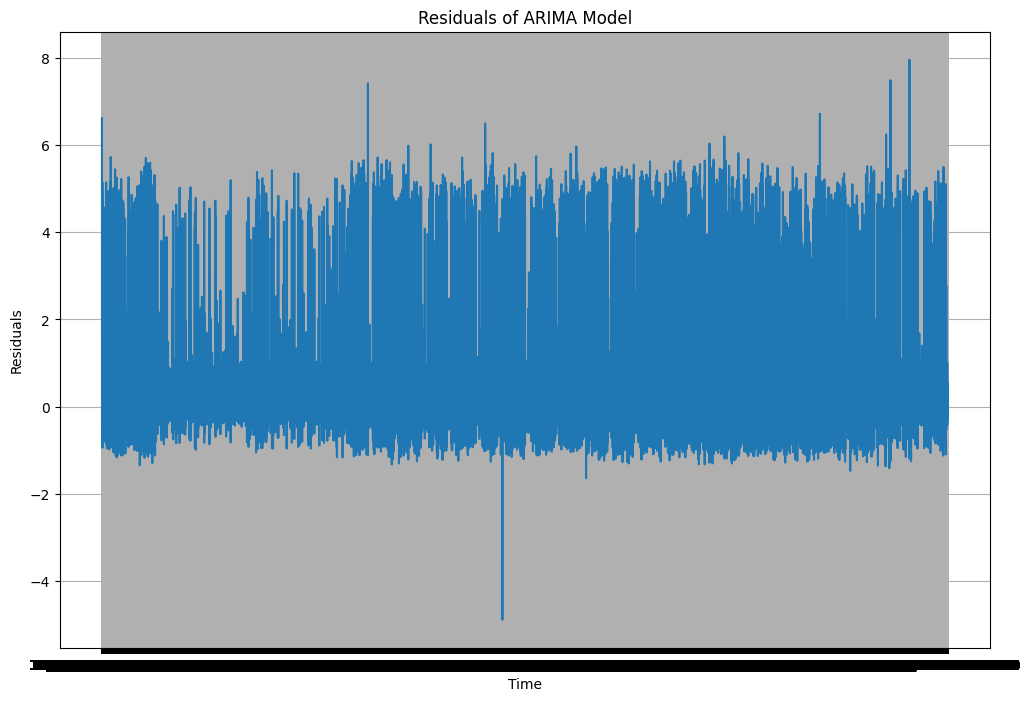

In [13]:
# line plot of residuals
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
plt.figure(figsize=(12, 8))  # Adjust the figsize as per your preference
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

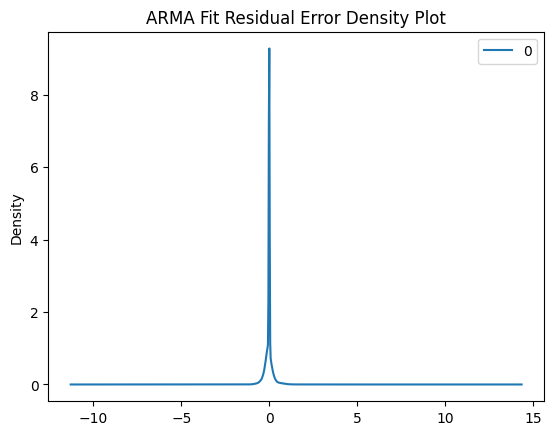

                  0
count  5.500740e+05
mean   5.162890e-06
std    3.225621e-01
min   -4.880000e+00
25%   -4.000000e-02
50%   -6.022478e-07
75%    2.107867e-06
max    7.950000e+00


In [19]:
# density plot of residuals
residuals.plot(kind='kde')
plt.title('ARIMA Fit Residual Error Density Plot')
pyplot.show()
print(residuals.describe())
# summary stats of residuals

**Rolling Forecast ARIMA Model**

How to Forecast with ARIMA:

    Use the predict() function on the ARIMAResults object. This function requires the index of the time steps for which predictions are needed.
    To revert any differencing and return predictions in the original scale, set the typ argument to ‘levels’.
    For a simpler one-step forecast, employ the forecast() function. 

We can split the training dataset into train and test sets, use the train set to fit the model and generate a prediction for each element on the test set.

A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received.

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


train_data, test_data = new_df[0:int(len(new_df)*0.9)], new_df[int(len(new_df)*0.9):]


train_arima = train_data['y']
test_arima = test_data['y']


history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

/var/folders/bq/b47vvv5n2kxgsnrpx8jqvtqm0000gn/T/ipykernel_3419/2142587637.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])


In [23]:
#When dealing with time series data, a rolling forecast is often necessary due to the dependence on prior observations. One way to do this is to re-create the model after each new observation is received. 

#To keep track of all observations, we can manually maintain a list called history, which initially contains training data and to which new observations are appended each iteration. This approach can help us get an accurate forecasting model.

In [ ]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/var/folders/bq/b47vvv5n2kxgsnrpx8jqvtqm0000gn/T/ipykernel_3419/1295931633.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]
/var/folders/bq/b47vvv5n2kxgsnrpx8jqvtqm0000gn/T/ipykernel_3419/1295931633.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]
/var/folders/bq/b47vvv5n2kxgsnrpx8jqvtqm0000gn/T/ipykernel_3419/1295931633.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]
/var/folders/bq/b47

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df1['y'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df1['forecast']=results.predict(start=90,end=103,dynamic=True)
df1[['y','forecast']].plot(figsize=(12,8))

/home/anurag.khuntia@npci.org.in/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
/home/anurag.khuntia@npci.org.in/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/anurag.khuntia@npci.org.in/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
/home/anurag.khuntia@npci.org.in/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: V

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.65434D+00    |proj g|=  1.92590D+01

At iterate    5    f= -2.70976D+00    |proj g|=  1.46463D-01

At iterate   10    f= -2.71148D+00    |proj g|=  4.32887D+00

At iterate   15    f= -2.72186D+00    |proj g|=  1.08703D-01

At iterate   20    f= -2.72501D+00    |proj g|=  3.39273D+00

At iterate   25    f= -2.76335D+00    |proj g|=  4.85868D-01

At iterate   30    f= -2.77182D+00    |proj g|=  1.95451D-02
